In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 

In [2]:
data = pd.read_csv('Fraud_check.csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
data.shape

(600, 6)

In [4]:
data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [5]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
data1 = pd.Series(data['Taxable.Income'])
s=[]
for i in data1:
    if i<=30000:
        s.append('risky')
    else:
        s.append('good')
print(s)

['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'risky', 'good', 'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'risky', 'good', 'risky', 'good', 'good', 'risky', 'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'risky', 'risky', 'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'risky', 'good', 'good', 'ris

In [8]:
data2 = pd.DataFrame(s)
data3 = pd.concat([data2,data],axis=1)
data3 = data3.rename({0:'o/p'},axis=1)
data3

,o/p,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,good,NO,Single,68833,50047,10,YES
1,good,YES,Divorced,33700,134075,18,YES
2,good,NO,Married,36925,160205,30,YES
3,good,YES,Single,50190,193264,15,YES
4,good,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...,...
595,good,YES,Divorced,76340,39492,7,YES
596,good,YES,Divorced,69967,55369,2,YES
597,good,NO,Divorced,47334,154058,0,YES
598,good,YES,Married,98592,180083,17,NO


In [9]:
labelencoder = LabelEncoder()
data3.iloc[:,0] = labelencoder.fit_transform(data3.iloc[:,0])
data3.iloc[:,1] = labelencoder.fit_transform(data3.iloc[:,1])
data3.iloc[:,6] = labelencoder.fit_transform(data3.iloc[:,6])
data3.iloc[:,2] = labelencoder.fit_transform(data3.iloc[:,2])
data3

,o/p,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,2,68833,50047,10,1
1,0,1,0,33700,134075,18,1
2,0,0,1,36925,160205,30,1
3,0,1,2,50190,193264,15,1
4,0,0,1,81002,27533,28,0
...,...,...,...,...,...,...,...
595,0,1,0,76340,39492,7,1
596,0,1,0,69967,55369,2,1
597,0,0,0,47334,154058,0,1
598,0,1,1,98592,180083,17,0


In [10]:
array = data3.values
array

array([[     0,      0,      2, ...,  50047,     10,      1],
       [     0,      1,      0, ..., 134075,     18,      1],
       [     0,      0,      1, ..., 160205,     30,      1],
       ...,
       [     0,      0,      0, ..., 154058,      0,      1],
       [     0,      1,      1, ..., 180083,     17,      0],
       [     0,      0,      0, ..., 158137,     16,      0]], dtype=int64)

In [11]:
x = array[:,1:7]
y = array[:,0]

In [12]:
x

array([[     0,      2,  68833,  50047,     10,      1],
       [     1,      0,  33700, 134075,     18,      1],
       [     0,      1,  36925, 160205,     30,      1],
       ...,
       [     0,      0,  47334, 154058,      0,      1],
       [     1,      1,  98592, 180083,     17,      0],
       [     0,      0,  96519, 158137,     16,      0]], dtype=int64)

In [13]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 25,test_size = 0.25)

In [15]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(450, 6)
(450,)
(150, 6)
(150,)


In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
log_model = LogisticRegression()
cv_score = cross_val_score(estimator=log_model,X=x,y=y,cv=5)
print('cv score for 5 fold = {}\nMean = {}\nStd = {}.'.format(cv_score,cv_score.mean(),cv_score.std()))

cv score for 5 fold = [0.9        0.89166667 0.9        0.9        0.95      ]
Mean = 0.9083333333333334
Std = 0.021081851067789165.


In [18]:
rf_model = RandomForestClassifier( n_estimators=100,criterion='gini',max_depth=None,min_samples_split=2)
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [19]:
grid_model = GridSearchCV(estimator = rf_model,param_grid = {'n_estimators':[20,30,40,50,60],
                                                             'criterion':['gini','entropy'],
                                                             'max_depth':[2,3,4,5,6,7],
                                                             'random_state':[2,3,4,5]})
grid_model.fit(x_train,y_train)
print(grid_model.best_params_)
print(grid_model.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 30, 'random_state': 4}
0.9977777777777778


In [20]:
y_pred_train = rf_model.predict(x_train)
y_pred_train

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [21]:
y_pred_test = rf_model.predict(x_test)
y_pred_test

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [22]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       355
           1       1.00      1.00      1.00        95

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



In [23]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00        29

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [24]:
confusion_matrix(y_train,y_pred_train)

array([[355,   0],
       [  0,  95]], dtype=int64)

In [25]:
confusion_matrix(y_test,y_pred_test)

array([[121,   0],
       [  0,  29]], dtype=int64)

1.0


Text(0, 0.5, 'True Positive Rate')

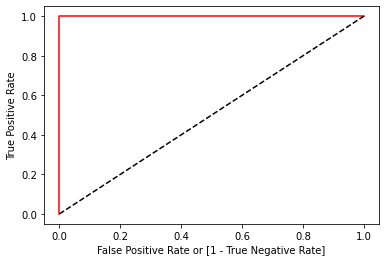

In [26]:
fpr, tpr, thresholds = roc_curve(y, rf_model.predict_proba (x)[:,1])

auc = roc_auc_score(y_train, y_pred_train)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

1.0


Text(0, 0.5, 'True Positive Rate')

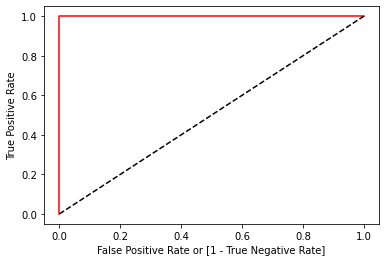

In [27]:
fpr, tpr, thresholds = roc_curve(y, rf_model.predict_proba (x)[:,1])

auc = roc_auc_score(y_test, y_pred_test)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')